In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/airline-passenger-satisfaction/test.csv
/kaggle/input/airline-passenger-satisfaction/train.csv


In [2]:
train=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
test=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')

In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train=train.drop(train.columns[0:2],1)
test=test.drop(test.columns[0:2],1)

In [5]:
train.shape, test.shape

((103904, 23), (25976, 23))

In [6]:
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
def get_cat(df):
    """Gets list of categorical features from passed dataframe"""
    cat=[]
    for i in df.columns:
        if df[i].dtypes=='object':
            cat.append(i) 
    return cat

In [8]:
cat1=get_cat(train)
cat2=get_cat(test)

In [9]:
train[train.isna().any(1)].shape

(310, 23)

In [10]:
test[test.isna().any(1)].shape

(83, 23)

## handling missing nominal features

In [11]:
def get_nom(df):
    """Gets nominal feature"""
    nom=[]
    for i in df.columns:
        if df[i].dtypes!='object':
            nom.append(i)
    return nom[2:]  # no need of feature id and age

In [12]:
nom1=get_nom(train)
nom2=get_nom(test)

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imp=SimpleImputer(strategy='median')
# impute with median

In [15]:
def impute(df, nom):
    "Impute for nan values"
    for i in nom:
        df[i]=imp.fit_transform(df[i][:, np.newaxis])
    return df

In [16]:
train=impute(train, nom1)
test=impute(test, nom2)

In [17]:
train[train.isna().any(1)].shape, test[test.isna().any(1)].shape
# no missing values

((0, 23), (0, 23))

### Visulaization, lets look what our data intend to tell us

In [18]:
import matplotlib.pyplot as plt

In [19]:
def bar_plot(df,col):
    """Plot bar graph based on passed categorical features"""
    
    satisfied=df[col][df['satisfaction']=='satisfied'].value_counts()
    neutral=df[col][df['satisfaction']=='neutral or dissatisfied'].value_counts()
    dt=pd.DataFrame([satisfied,neutral], index=['satisfied','neutral or dissatisfied'])
    dt.plot.bar(stacked=True)

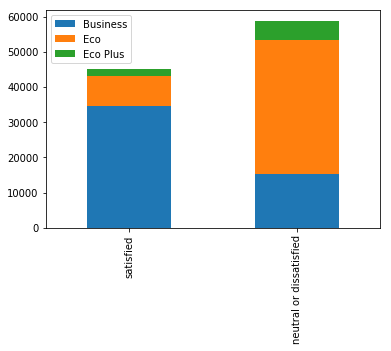

In [20]:
bar_plot(train,'Class')

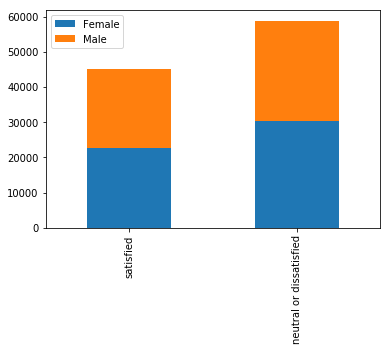

In [21]:
bar_plot(train, 'Gender')

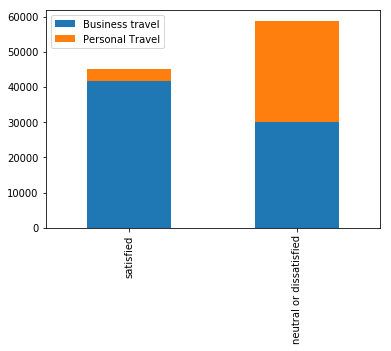

In [22]:
bar_plot(train, 'Type of Travel')

## feature encoding for categorical features

In [23]:
cat1=cat1[0:4]
cat2=cat2[0:4]

In [24]:
def cat_enc(df,cat):
    """Encoding (by get_dummies) for categorical features.
    Dropping the original feature before getting new dummy for each category in feature
    """
    dummies=[]
    for i in cat:
        dummies=pd.get_dummies(df[i], drop_first=True, prefix=i)
        df=df.drop(i,axis=1)
        df=pd.concat([df,dummies],1)
    return df

In [25]:
train=cat_enc(train, cat1)
test=cat_enc(test, cat2)

In [26]:
train.head(1)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,...,5.0,5.0,25.0,18.0,neutral or dissatisfied,1,0,1,0,1


In [27]:
# encoding for our target feature (satisfaction)
train['satisfaction']=train['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
test['satisfaction']=test['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
# no need to target feature in test dataframe since we are about to predict it
#test.drop('satisfaction',1,inplace=True)

In [28]:
dtrain=train.copy()
dtest=test.copy()

## Model validation

In [29]:
train.head(1)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,...,5.0,5.0,25.0,18.0,0,1,0,1,0,1


In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [31]:
X=dtrain.drop('satisfaction',1)
y=dtrain['satisfaction']
x_test=dtest.drop('satisfaction',1)

### Scaling

In [32]:
scale=StandardScaler()
X=scale.fit_transform(X)
x_test=scale.fit_transform(x_test)

In [33]:
x_train, x_val, y_train, y_val=train_test_split(X,y,shuffle=False)

#### Cross Validation using stratifiedkfold 

In [34]:
skf=StratifiedKFold(n_splits=10, shuffle=False)

### LogisticRegression

In [35]:
logi_reg=LogisticRegression()
score= cross_val_score(logi_reg, X, y, scoring='accuracy', cv=skf)
print(score)
print('avg score:',np.mean(score)*100)

[0.87364065 0.87460302 0.87133096 0.87537292 0.87545717 0.8719923
 0.87526468 0.87401347 0.87901829 0.87892204]
avg score: 87.49615500716962


### RandomForestClassifier

In [36]:
rfc=RandomForestClassifier(5)
score= cross_val_score(rfc, X, y, scoring='accuracy', cv=skf)
print(score)
print('avg score:',np.mean(score)*100)

[0.94947551 0.95082283 0.95274757 0.95563468 0.94860443 0.94985563
 0.9506256  0.95004812 0.95437921 0.95360924]
avg score: 95.1580282188749


### GradientBoostingClassifier

In [37]:
gbc=GradientBoostingClassifier(n_estimators=20)
score= cross_val_score(gbc, X, y, scoring='accuracy', cv=skf)
print(score)
print('avg score:',np.mean(score)*100)

[0.90761236 0.90482148 0.90116447 0.90674622 0.90490857 0.90856593
 0.91308951 0.90981713 0.90317613 0.90221367]
avg score: 90.62115462509246


### Testing

In [38]:
## rfc looks good here to me
## lets predict using this
rfc=RandomForestClassifier(5)
rfc.fit(x_train, y_train)
ypred=rfc.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(dtest['satisfaction'], ypred)

0.9492223591007084